In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from math import exp
from sklearn.datasets import make_classification, make_gaussian_quantiles

import warnings
warnings.filterwarnings('ignore')
from mpltools import style
style.use('ggplot')

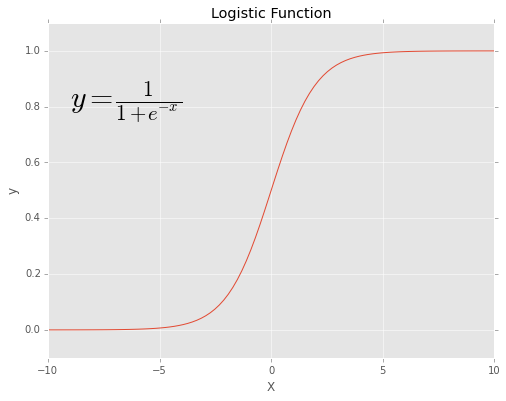

In [2]:
X = np.linspace(-10, 10, 100)
y = [1/(1+exp(-x)) for x in X]

fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,6)
ax.plot(X, y)
ax.set_title("Logistic Function")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_ylim([-.1, 1.1])
ax.text(-9, 0.8, r'$y = \frac{1}{1+e^{-x}}$', fontsize=30)

fig.show()

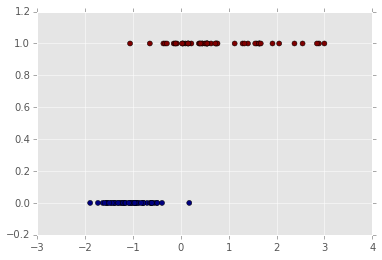

In [3]:
X0, y0 = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=96)
plt.scatter(X0, y0, marker='o', c=y0, s=25, edgecolor='k')

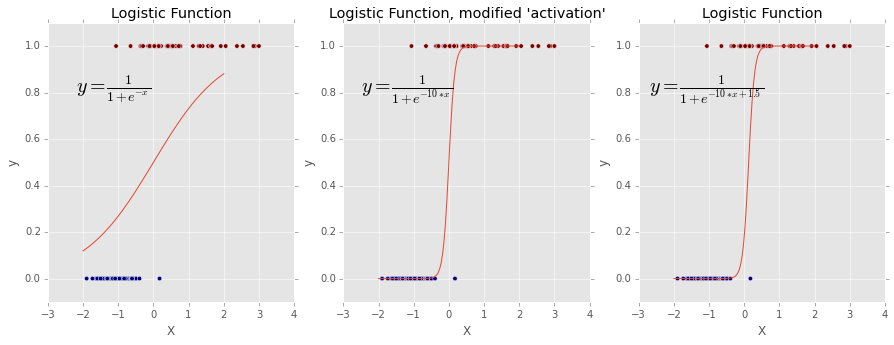

In [4]:
X = np.linspace(-2, 2, 100)
y = [1/(1+np.exp(-x)) for x in X]
y_m1 = [1/(1+np.exp(-(12*x))) for x in X]
y_m2 = [1/(1+np.exp(-(12*x-1.5))) for x in X]

fig, ax = plt.subplots(1,3, sharex=True)
fig.set_size_inches(15,5)
ax[0].scatter(X0, y0, c=y0)
ax[0].plot(X, y)
ax[0].set_title("Logistic Function")
ax[0].set_xlabel("X")
ax[0].set_ylabel("y")
ax[0].set_ylim([-.1, 1.1])
ax[0].text(-2.2, 0.8, r'$y = \frac{1}{1+e^{-x}}$', fontsize=20)

ax[1].scatter(X0, y0, c=y0)
ax[1].plot(X, y_m1)
ax[1].set_title("Logistic Function, modified 'activation'")
ax[1].set_xlabel("X")
ax[1].set_ylabel("y")
ax[1].set_ylim([-.1, 1.1])
ax[1].text(-2.5, 0.8, r'$y = \frac{1}{1+e^{-10*x}}$', fontsize=20)

ax[2].scatter(X0, y0, c=y0)
ax[2].plot(X, y_m2)
ax[2].set_title("Logistic Function")
ax[2].set_xlabel("X")
ax[2].set_ylabel("y")
ax[2].set_ylim([-.1, 1.1])
ax[2].text(-2.7, 0.8, r'$y = \frac{1}{1+e^{-10*x + 1.5}}$', fontsize=20)

fig.show()

<h1>Plot cost vs. hyper parameters</h1>
<p>The cost for logistic regression is not L2 error as used in linear regression.  The reason for this is that Squared error is non-convex for sufficiently complicated data, and as such, will not converge.</p>

In [6]:
def sigmoid(x, b0, b1):
    return 1/(1+np.exp(-(b0+x*b1)))

def point_cost(x, y, b0, b1):
    return (y-1)*np.log(1-sigmoid(x, b0, b1)) - y*np.log(sigmoid(x, b0, b1))

def cost(x, y, b0, b1):
    return sum([point_cost(u[0], u[1], b0, b1) for u in zip(x,y)])

1.90909090909 5.05050505051


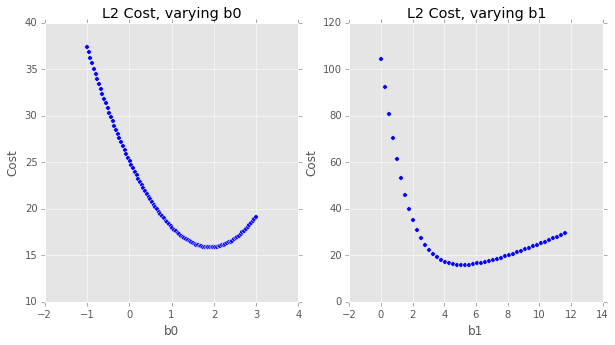

In [7]:
b0 = np.linspace(-1,3, 100)
b1 = np.linspace(0,25, 100)
c0 = [cost(X0, y0, u, 5.05) for u in b0]
c1 = [cost(X0, y0, 1.78, u) for u in b1]

fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
ax[0].scatter(b0, c0)
ax[0].set_title("L2 Cost, varying b0")
ax[0].set_xlabel("b0")
ax[0].set_ylabel("Cost")

ax[1].scatter(b1, c1)
ax[1].set_title("L2 Cost, varying b1")
ax[1].set_xlabel("b1")
ax[1].set_ylabel("Cost")

print(b0[c0.index(min(c0))], b1[c1.index(min(c1))])

fig.show()

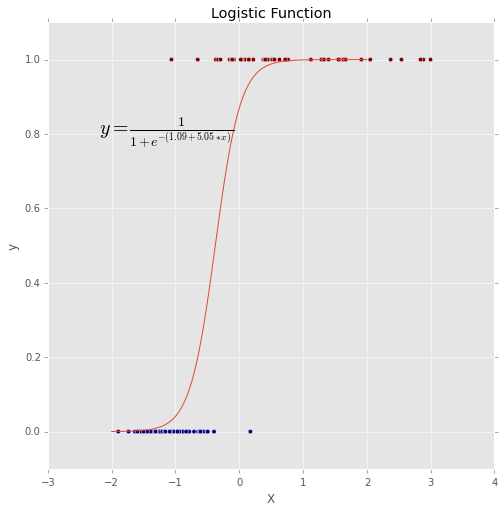

In [8]:
ideal = [sigmoid(u, 1.90, 5.05) for u in X]

fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,8)
ax.scatter(X0, y0, c=y0)
ax.plot(X, ideal)
ax.set_title("Logistic Function")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_ylim([-.1, 1.1])
ax.text(-2.2, 0.8, r'$y = \frac{1}{1+e^{-(1.09+5.05*x)}}$', fontsize=20)

fig.show()

<h1>Define Descision Boundary</h1>
<p>Now that we have an approximate line of best fit, let's identify a descision boundary</p>

In [ ]:
print(len([x for x in ideal if x<0.5]))
print(X[44])

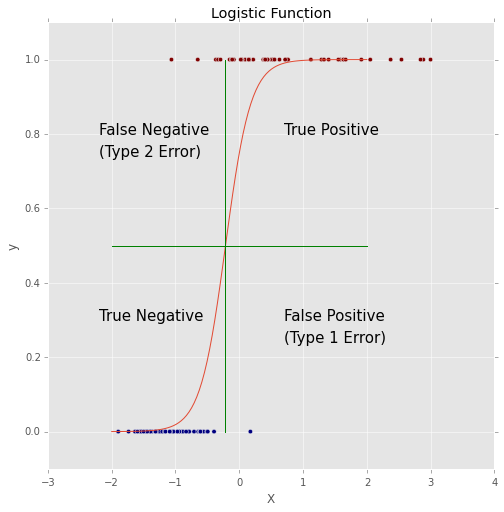

In [9]:
b0 = 1.09
b1 = 5.05
ideal = [sigmoid(u, b0, b1) for u in X]
desc = [.5 for u in X]


fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,8)
ax.scatter(X0, y0, c=y0)
ax.plot(X, ideal)
ax.plot(X, desc, color='g')
ax.plot([-0.22, -0.22], [0,1], color='g')
ax.set_title("Logistic Function")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_ylim([-.1, 1.1])
ax.text(-2.2, 0.8, r'False Negative', fontsize=15)
ax.text(-2.2, 0.74, r'(Type 2 Error)', fontsize=15)
ax.text(0.7, 0.8, r'True Positive', fontsize=15)
ax.text(-2.2, 0.3, r'True Negative', fontsize=15)
ax.text(0.7, 0.3, r'False Positive', fontsize=15)
ax.text(0.7, 0.24, r'(Type 1 Error)', fontsize=15)

fig.show()

<h1>Stop here</h1>
<p>Let's work through an example together where we use the scikit learn module to build a logistic regression classifier against 2-D toy data</p>
<br/>
<br/>
<h1>Time for ROC curves</h1>
<p>ROC - receiver operating characteristic is a way of exploring the performance of a model by varying the decision threshold of a classifier.</p>

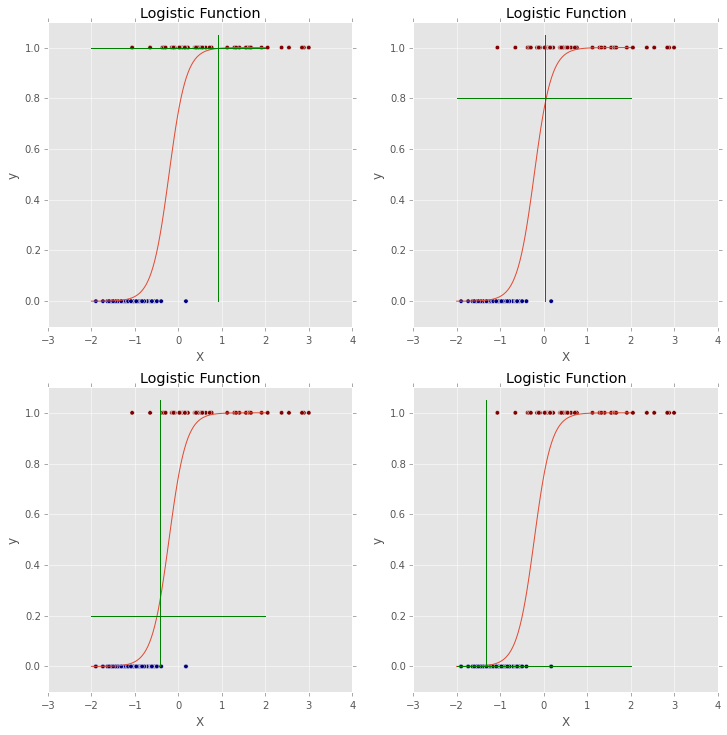

In [10]:
d1 = [.999 for u in X]
d2 = [.80 for u in X]
d3 = [.2 for u in X]
d4 = [.001 for u in X]

fig, ax = plt.subplots(2,2)
fig.set_size_inches(12,12)
ax[0,0].scatter(X0, y0, c=y0)
ax[0,0].plot(X, ideal)
ax[0,0].plot(X, d1, color='g')
ax[0,0].plot([0.92, 0.92], [0,1.05], color='g')
ax[0,0].set_title("Logistic Function")
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("y")
ax[0,0].set_ylim([-.1, 1.1])

ax[0,1].scatter(X0, y0, c=y0)
ax[0,1].plot(X, ideal)
ax[0,1].plot(X, d2, color='g')
ax[0,1].plot([0.04, 0.04], [0,1.05], color='g')
ax[0,1].set_title("Logistic Function")
ax[0,1].set_xlabel("X")
ax[0,1].set_ylabel("y")
ax[0,1].set_ylim([-.1, 1.1])

ax[1,0].scatter(X0, y0, c=y0)
ax[1,0].plot(X, ideal)
ax[1,0].plot(X, d3, color='g')
ax[1,0].plot([-0.42, -0.42], [0,1.05], color='g')
ax[1,0].set_title("Logistic Function")
ax[1,0].set_xlabel("X")
ax[1,0].set_ylabel("y")
ax[1,0].set_ylim([-.1, 1.1])

ax[1,1].scatter(X0, y0, c=y0)
ax[1,1].plot(X, ideal)
ax[1,1].plot(X, d4, color='g')
ax[1,1].plot([-1.33, -1.33], [0,1.05], color='g')
ax[1,1].set_title("Logistic Function")
ax[1,1].set_xlabel("X")
ax[1,1].set_ylabel("y")
ax[1,1].set_ylim([-.1, 1.1])

fig.show()

In [11]:
# Create steps for our descision thresholds, and identify the resulting classification thresholds from our funciton
thrs = np.linspace(2.2, -2.2, 100)
model_out = [sigmoid(x, b0, b1)[0] for x in X0]

# Create array of true positives and false positives (i.e. ROC space)
true_pos = [len([1 for x in zip(model_out, y0) if x[0]>y and x[1]==1])/51 for y in thrs]
false_pos = [len([1 for x in zip(model_out, y0) if x[0]>y and x[1]==0])/49 for y in thrs]

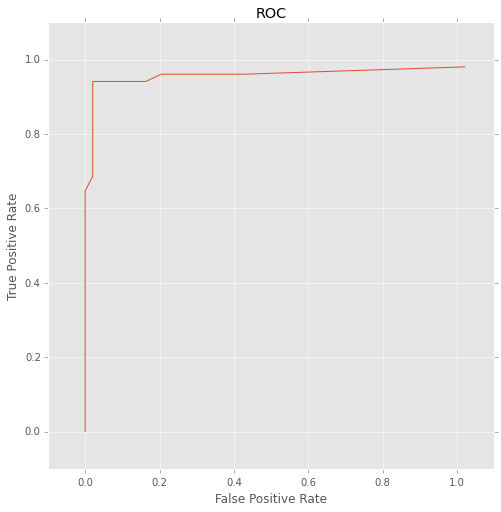

In [12]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,8)
ax.plot(false_pos, true_pos)
ax.set_title("ROC")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_xlim(-.1,1.1)
ax.set_ylim(-.1,1.1)

fig.show()

<p>Real talk time....this is a nearly perfect ROC curve.  Just know you will never see something that looks like this.</p>